<a href="https://colab.research.google.com/github/AI-Krittaya/BSC_DPDM2025/blob/main/Ch3_Data_Prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [42]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025/data/flooding database.csv')

In [ ]:
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

### Check Missing Data

In [ ]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Record ที่มี  missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้

- dfo_country

- dfo_other_country

- dfo_began

- dfo_ended

- dfo_dead

- dfo_cause

- dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset = ['dfo_country','dfo_other_country','dfo_began',
                                     'dfo_ended','dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape

(637, 23)

In [ ]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


In [ ]:
flood_filldummy = flood.fillna({'dfo_other_country':'Unknown'})
flood_filldummy

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,Unknown,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,Unknown,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,Unknown,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,Unknown,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม Missing ด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna({'dfo_cause':'Heavy rain'})
flood_fillmode

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติมด้วย ตัวแทนของกลุ่ม

In [ ]:
flood.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [ ]:
flood_sever1 = flood[flood['dfo_severity'] == 1.0]
flood_sever15 = flood[flood['dfo_severity'] == 1.5]
flood_sever2 = flood[flood['dfo_severity'] == 2.0]

In [ ]:
flood_sever1 = flood_sever1.fillna({'dfo_cause':'Heavy rain'})
flood_sever15 = flood_sever2.fillna({'dfo_cause':'Heavy rain'})
flood_sever2 = flood_sever15.fillna({'dfo_cause':'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])
flood_fillgroup

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
5,DFO_1631_From_20000901_to_20000906,1631,std,0,China,0,113.483009,25.229313,9/1/00,9/6/00,...,Heavy rain,1.0,102.25,18.0,18.0,628,1,0,-610,NaN
9,DFO_1772_From_20010806_to_20010913,1772,std,0,Sudan,Ethiopia,34.427661,14.996666,8/6/01,9/13/01,...,Heavy rain,1.0,1384.61,11849.0,11849.0,11615,1,0,234,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,DFO_4507_From_20170810_to_20170826,4507,std,NaN,India,NaN,79.076049,28.165660,8/10/17,8/26/17,...,Heavy rain,2.0,22260.03,4982993.0,1501873.0,4982993,1,3481120,0,NaN
879,DFO_4515_From_20170823_to_20170826,4515,std,TC-2017-000120-CHN,China,NaN,114.138854,22.385119,8/23/17,8/26/17,...,"Tropical Storm, Surge",2.0,202.12,72361.0,58833.0,72361,1,13528,0,NaN
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
905,DFO_4667_From_20180820_to_20181002,4667,otsu,NaN,Nigeria,NaN,8.237500,10.474800,8/20/18,10/2/18,...,Heavy rain,2.0,8403.28,1448274.0,532141.0,1448274,1,916133,0,NaN


In [ ]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,165
dfo_country,0
dfo_other_country,203
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

In [ ]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


Explore data

In [ ]:
from matplotlib import pyplot as plt

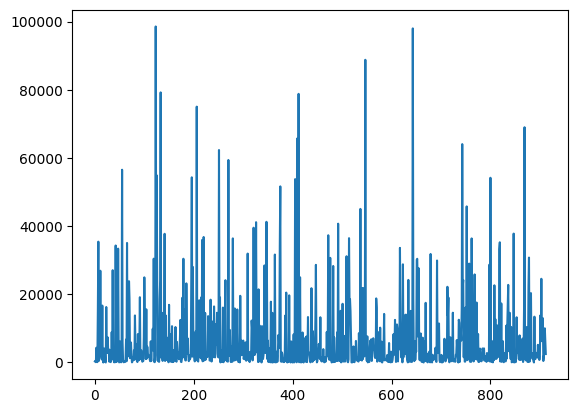

In [ ]:
plt.plot(flood['gfd_area'])


ใช้ histogram ดู Bรn ที่เหมาะสม

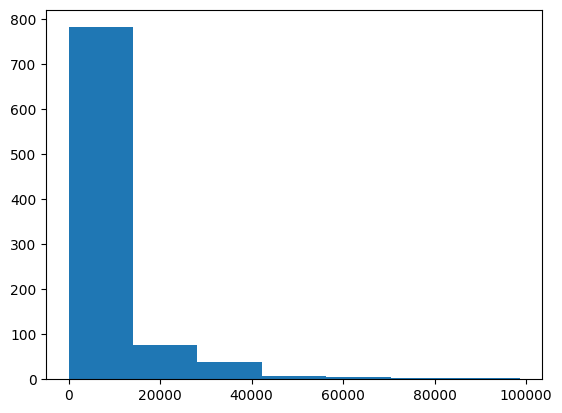

In [ ]:
outputhist = plt.hist(flood['gfd_area'],7);

In [ ]:
outputhist
# 1.ความถี่
# 2.ค่าช่วง

(array([781.,  75.,  38.,   7.,   6.,   3.,   3.]),
 array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
        56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ]),
 <BarContainer object of 7 artists>)

create a function that output a mean of bin the value lended in where the bin in follow histogram of 30 bin

In [ ]:
def put_value_into_bins(value,bin_edgs):
  for i in range(len(bin_edgs)-1):
    if value >= bin_edgs[i] and value < bin_edgs[i+1]:
      new_val = bin_edgs[i] + (bin_edgs[i+1] - bin_edgs[i])/2
      return new_val
  return None

In [ ]:
put_value_into_bins(3000,outputhist[1])

np.float64(7039.115714285714)

In [ ]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bins(x, outputhist[1])) #applyใช้แก้ค่าที่อยู่ในตาราง


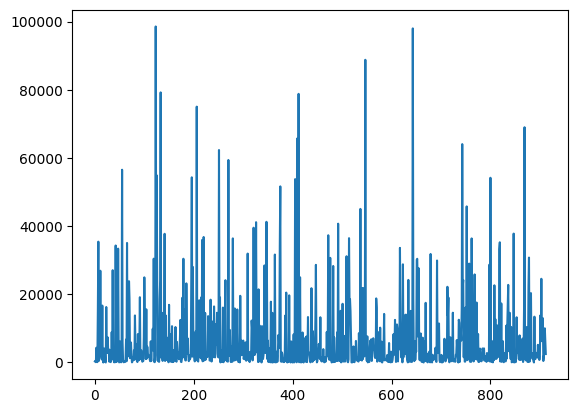

In [ ]:
plt.plot(flood['gfd_area'])

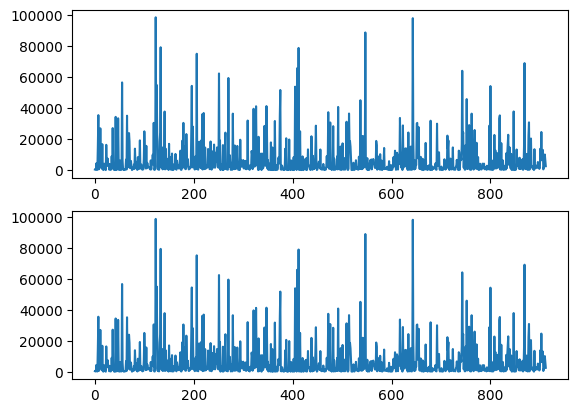

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gfd_area'])

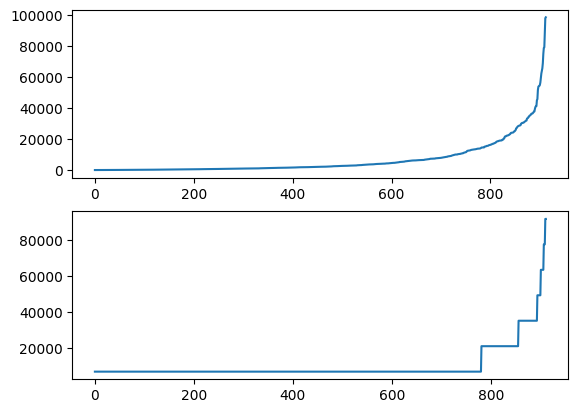

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

## Outlier Removal

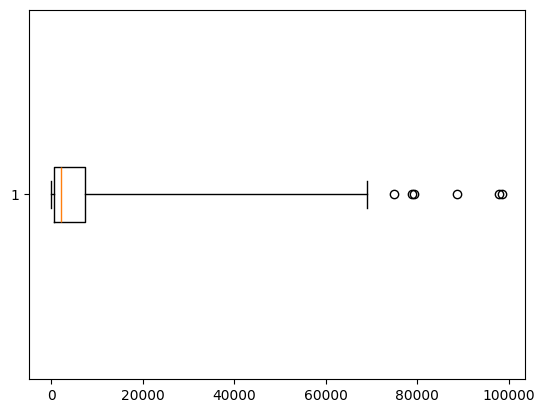

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

In [ ]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7e96817028d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9681702ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e96817025a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9681703440>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9681703680>],
 'means': []}

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area'] <
                        outputbox['whiskers'][1].get_xdata()[1]]


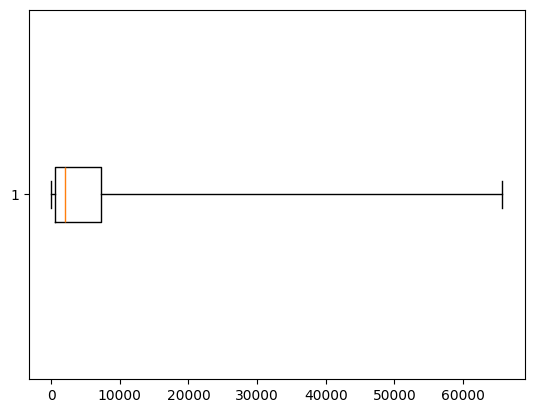

In [ ]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10);

ตามหาค่า outlier

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gdf_area_bin,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN,NaN


# Data Integration

## Data Exploration

In [43]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025/data/Copy of opendata_project-2.csv')

In [58]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [59]:
for i in project_df.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [60]:
unit_df = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025/data/Copy of opendata_unittype-2.csv')
unit_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,1.0,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11


In [61]:
for i in unit_df.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more column to the table

In [ ]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th','developer_name_en',
                                                             'neighborhood_name_th','subdistrict_name_th',
                                                             'district_name_th','province_name_th'])

In [62]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## Deduplication

ดูก่อนว่า  Data มัน Duplicate ยังไง

In [78]:
project_df.duplicated().any()

np.True_

In [79]:
project_df.duplicated(keep=False).sum()

np.int64(4)

In [80]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
project_df.duplicated(subset=['project_id'], keep=False).sum()

np.int64(6981)

In [82]:
project_df[project_df.duplicated(subset=['project_id'], keep=False)].head(50).sort_values('project_id')


,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
148,1763.0,5e54dbc4b33a1500123c692c,Baan Pruksa Hin Kong-Saraburi,บ้านพฤกษา หินกอง-สระบุรี,1,Detached House,บ้าน,1360000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2020-02-25 15:33:08,NaN,2020-12-04 10:33:24,baania,https://baania.com/th/project/บ้านพฤกษา-หินกอง...,2023-06-11
122,2023.0,5e6857f1c91cd30012894fe5,Alice Land,อลิซ แลนด์,4,Commercial,อาคารพาณิชย์,3990000.0,developer_10662,"HONGTAI GROUP CO., LTD.",...,1.0,NaN,1.0,1.0,2020-03-11 10:16:01,NaN,2022-11-21 16:30:03,baania,https://baania.com/th/project/อลิซ-แลนด์-5e685...,2023-06-11
168,9297.0,5e86ba8d5f777e0012d06af5,Phrueksakarn 12,พฤกษากาญจน์ 12,1,Detached House,บ้าน,1800000.0,developer_9130,"L.H.M. Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2020-04-03 11:24:45,NaN,2020-12-04 10:32:09,baania,https://baania.com/th/project/พฤกษากาญจน์-12-5...,2023-06-11
67,15966.0,5e9973839f161600121b5eb3,Nathawadee Grand Park Map Saen Suk,ณฐาวดี แกรนด์ พาร์ค มาบแสนสุข,20000,Twin house,บ้านแฝด,1690000.0,developer_6192,Trinatawat Company Limited,...,1.0,NaN,NaN,1.0,2020-04-17 16:14:43,2021-01-01 07:00:00,2021-01-28 11:00:06,baania,https://baania.com/th/project/ณฐาวดี-แกรนด์-พา...,2023-06-11
78,16607.0,5e9fc23c38be3400128e32d6,Palmprings Promenade,ปาล์มสปริงส์ พรอมานาด,20000,Twin house,บ้านแฝด,3500000.0,developer_8706,NaN,...,1.0,1.0,NaN,1.0,2020-04-22 11:04:12,2021-01-01 07:00:00,2020-12-04 10:33:20,baania,https://baania.com/th/project/ปาล์มสปริงส์-พรอ...,2023-06-11
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
151,10864.0,5ee2f7e4dda791001299b5d5,ATRIA Sathorn-Sathu,เอเทรีย สาทร-สาธุ,20000,Twin house,บ้านแฝด,20000000.0,developer_8730,"WYNN ESTATE CO., LTD.",...,NaN,NaN,NaN,NaN,2020-06-12 10:35:00,2022-01-01 07:00:00,2022-12-26 18:30:02,baania,https://baania.com/th/project/เอเทรีย-สาทร-สาธ...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
108,13827.0,5f06a296b285eb00194de725,Kerati Bangsaen,กีรติ บางแสน,3,Townhome,ทาวน์โฮม,2990000.0,5f069726b285eb00194de6e4,"Keerati House 2014 Co., Ltd.",...,1.0,1.0,1.0,1.0,2020-07-09 11:52:38,2020-01-01 07:00:00,2022-07-04 16:30:09,baania,https://baania.com/th/project/กีรติ-บางแสน-5f0...,2023-06-11
55,10827.0,5f2d191e306e7e0019069070,Supalai Ville Sanphisuea,ศุภาลัย วิลล์ สันผีเสื้อ,3,Townhome,ทาวน์โฮม,2340000.0,developer_97,Supalai Public Company Limited,...,1.0,NaN,NaN,1.0,2020-08-07 16:04:30,2021-01-01 07:00:00,2022-01-24 15:30:04,baania,https://baania.com/th/project/ศุภาลัย-วิลล์-สั...,2023-06-11


ลบข้อมูลที่มี project ซ้ำกันโดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด (ตัวอย่าง)

In [88]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'], keep='last')
project_df_dedup.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11
5,16.0,project_14790,Huahin Palm Village,หัวหิน ปาล์ม วิลเลจ,1,Detached House,บ้าน,NaN,developer_10510,NaN,...,0.0,0.0,0.0,1.0,2018-10-04 13:44:29,2011-10-31 07:00:00,2020-12-04 10:45:10,baania,https://baania.com/th/project/หัวหิน-ปาล์ม-วิล...,2023-06-11


map data ที่ไม่มี duplicated index

In [91]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


## HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ



('developer_name_en','neighborhood_name_th','subdistrict_name_th','district_name_th','province_name_th')


## Data Transformation

## Column Alignment

## Add Data Source Column